In [73]:
from nsepy import get_history
import datetime as dt
import os
import pandas as pd 
from collections import Counter
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import  cm
from matplotlib import style
import seaborn as sb
%matplotlib inline
from sklearn import svm, neighbors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,VotingClassifier 
#import mpld3
#mpld3.enable_notebook()
#style.use('ggplot')

In [61]:
df = pd.read_csv('ind_nifty50list.csv')
df.head()


,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
4,Bajaj Finance Ltd.,FINANCIAL SERVICES,BAJFINANCE,EQ,INE296A01024


In [62]:
stock_tickers = []
df['stock_name'] =  df['Symbol']
stock_tickers = df['stock_name'].tolist()
stock_tickers =  list(set(stock_tickers))
print(stock_tickers[:10])

['HDFC', 'NTPC', 'SBIN', 'UPL', 'DRREDDY', 'GAIL', 'ULTRACEMCO', 'TCS', 'GRASIM', 'ICICIBANK']


In [ ]:
def get_data_from_NSE():

    start = dt.datetime(2016,4,13)
    end = dt.datetime(2020,4,13)
    #api_key = 'zb8axk-U_Y8A3Z-JUxox'

    for stock in stock_tickers:
        print(stock)
        if not os.path.exists('stock_dfs/{}.csv'.format(stock)):
            data = get_history(symbol='{}'.format(stock) , start=start, end=end)
            data.to_csv('stock_dfs/{}.csv'.format(stock))
        else:
            print('Already have {}'.format(stock))


get_data_from_NSE()          

In [58]:
LT = pd.read_csv('LT.csv')
LT.head()   

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2018-04-13,LT,EQ,1357.45,1362.0,1364.35,1340.60,1363.50,1354.85,1351.47,1320241,1.784260e+14,60095,569135,0.4311
1,2018-04-16,LT,EQ,1354.85,1347.9,1372.00,1346.15,1367.75,1368.10,1364.59,1304778,1.780482e+14,46425,569675,0.4366
2,2018-04-17,LT,EQ,1368.10,1370.5,1377.90,1355.20,1359.95,1359.55,1363.20,1058589,1.443073e+14,51980,479411,0.4529
3,2018-04-18,LT,EQ,1359.55,1363.1,1371.45,1351.00,1363.35,1360.10,1362.47,1459202,1.988121e+14,73970,707239,0.4847
4,2018-04-19,LT,EQ,1360.10,1365.1,1388.10,1361.80,1384.65,1385.00,1377.55,2229317,3.071006e+14,83853,1473981,0.6612


In [63]:

def compile_data():
    main_df = pd.DataFrame()
    for count,ticker in enumerate(stock_tickers):
        df = pd.read_csv('stock_dfs_new/{}.csv'.format(ticker))
        df.set_index('Date', inplace = True)
        df.rename(columns = {'Close': ticker}, inplace=True )
        df.drop(['Symbol','Series','Prev Close','Open','High','Low','Last','VWAP','Volume','Turnover','Trades','Deliverable Volume','%Deliverble'],1, inplace = True)
    
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')
        
        if count % 10 == 0:
            print(count)
        
        
        main_df.to_csv('new_nifty50_joined_close.csv')
        
compile_data()
        

0
10
20
30
40


            HDFCBANK      HDFC  POWERGRID  BAJAJ-AUTO  ULTRACEMCO  INDUSINDBK  \
HDFCBANK    1.000000 -0.233932   0.367352   -0.112856    0.154960    0.605377   
HDFC       -0.233932  1.000000   0.288614    0.656363    0.692764   -0.082690   
POWERGRID   0.367352  0.288614   1.000000    0.340905    0.434706    0.484558   
BAJAJ-AUTO -0.112856  0.656363   0.340905    1.000000    0.531793    0.315035   
ULTRACEMCO  0.154960  0.692764   0.434706    0.531793    1.000000    0.177839   

             HCLTECH  HEROMOTOCO  NESTLEIND      ZEEL  ...      NTPC  \
HDFCBANK    0.664851    0.492937  -0.794198  0.667831  ...  0.620436   
HDFC       -0.216086   -0.355254   0.608830 -0.446921  ... -0.435685   
POWERGRID   0.453531    0.391921  -0.224372  0.336025  ...  0.391785   
BAJAJ-AUTO  0.126302    0.106718   0.241178 -0.038375  ... -0.033851   
ULTRACEMCO  0.174324   -0.077095   0.203763 -0.140704  ... -0.071062   

                 ITC  KOTAKBANK  SHREECEM      ONGC   DRREDDY  RELIANCE  \
HDFCB

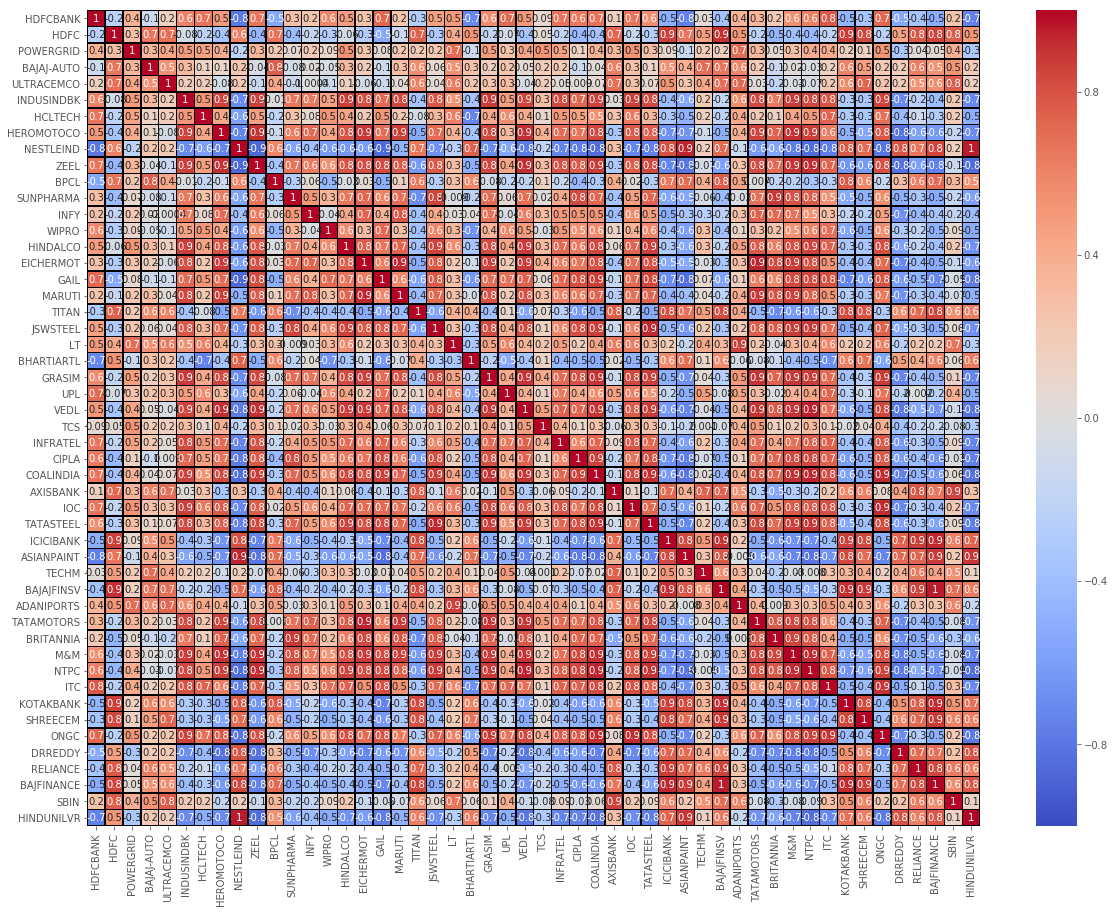

In [64]:
def visualize_data():
    combine_df = pd.read_csv('nifty50_joined_close.csv')
    df_corr = combine_df.corr()
    print(df_corr.head())
    data = df_corr.values
    #fig = plt.figure()
    #ax = fig.add_subplot(1,1,1)
    
    #heatmap = ax.pcolor(data, cmap=plt.cm.coolwarm)
    #fig.colorbar(heatmap)
    #ax.set_xticks(np.arange(data.shape[0] + 0.5))
    #ax.set_yticks(np.arange(data.shape[1] + 0.5))    
    #ax.invert_yaxis()
    #ax.xaxis.tick_top()
    
    #column_labels = df_corr.columns
    #row_labels = df_corr.index
    
    #ax.set_xticklabels(column_labels)
    #ax.setyticklabels(row_labels)
    #plt.xticks(rotation = 90)
    #heatmap.set_clim(-1,1)
    #plt.tight_layout()
    #plt.show()
    
    plt.figure(figsize = (20,15))
    sb.heatmap(df_corr, annot = True, vmin=-1, vmax=1, center= 0, cmap='coolwarm',linewidths=0.5, linecolor='black', fmt='.1g')
    plt.savefig('Correalation Analysis.png')
    
    
visualize_data()    

In [68]:
def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('new_nifty50_joined_close.csv', index_col = 0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace = True)
    
    for i in range(1,hm_days+1):
        df['{}_{}d'.format(ticker, i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
    
    df.fillna(0, inplace = True)
    return tickers, df
    print(df.head())
#process_data_for_labels('ITC')

In [69]:
def buy_hold_sell(*args):
    requirement = 0.02
    cols = [c for c in args ]
    for col in cols:
        if col > requirement:
            return 1
        elif col < -requirement:
            return -1
    return 0


In [70]:
def extract_featureset(ticker):
    tickers, df = process_data_for_labels(ticker)
    
    df['{}_target'.format(ticker)] = list(map(buy_hold_sell, 
                                             df['{}_1d'.format(ticker)],
                                             df['{}_2d'.format(ticker)],
                                             df['{}_3d'.format(ticker)],
                                             df['{}_4d'.format(ticker)],
                                             df['{}_5d'.format(ticker)],
                                             df['{}_6d'.format(ticker)],
                                             df['{}_7d'.format(ticker)]))
     
    vals = df['{}_target'.format(ticker)].values.tolist()
    str_values = [str(i) for i in vals]
    print('Data Spread :', Counter(str_values))
    
    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan )
    df.dropna(inplace=True)
    
    df_vals =  df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], np.nan )
    df_vals.fillna(0, inplace = True)
    
    X = df_vals.values
    y = df['{}_target'.format(ticker)].values
    
    return X,y,df

#extract_featureset('ITC')

Data Spread : Counter({'1': 821, '-1': 754, '0': 403})


(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.00426032, -0.00749625,  0.02386656, ...,  0.01221422,
         -0.00769823, -0.0065184 ],
        [ 0.00885217,  0.01208459,  0.01730608, ..., -0.00814769,
          0.00581846,  0.03840216],
        ...,
        [ 0.00234704,  0.04475782, -0.01824034, ...,  0.02648786,
          0.01108424,  0.021262  ],
        [ 0.09257121,  0.02230047,  0.02595628, ...,  0.0128482 ,
          0.00418577,  0.03828073],
        [-0.02812518,  0.01779564, -0.02263648, ..., -0.02302526,
          0.04346963, -0.02910737]]),
 array([1, 1, 0, ..., 1, 0, 0], dtype=int64),
                HDFC    NTPC     SBIN     UPL  DRREDDY    GAIL  ULTRACEMCO  \
 Date                                                                        
 2012-04-13   680.70  166.75  2212.30  128.50  1735.00  356.25     1475.35   
 2012-04-16   677.80  165.50  2265.10  126.90  1759.45  355.85     1441.05   
 2012-04-17   6

In [75]:
def do_ML(ticker):
    X,y,df = extract_featureset(ticker)
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)
    X_train = X[:int(X.shape[0]*0.7)]
    X_test = X[int(X.shape[0]*0.7):]
    y_train = y[:int(X.shape[0]*0.7)]
    y_test = y[int(X.shape[0]*0.7):]
    
    clf = VotingClassifier([('lvsc', svm.LinearSVC()),
                            ('knn', neighbors.KNeighborsClassifier()),
                            ('rfor', RandomForestClassifier())])
    
    clf.fit(X_train,y_train) 
    confidence = clf.score(X_train,y_train)
    print('Accuracy:', confidence)
    predictions = clf.predict(X_test)
    print('Predicted Spread:', Counter(predictions))
    
    return confidence

do_ML('ITC')

Data Spread : Counter({'1': 821, '-1': 754, '0': 403})


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.7854046242774566
Predicted Spread: Counter({1: 372, -1: 216, 0: 6})


0.7854046242774566